In [527]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
from pandas import get_dummies

%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


**Data Import**

In [334]:
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [335]:
data.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


**Data Preprocessing**

In [336]:
data.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [337]:
data.dropna(thresh=2)
filtered_data = data[data['Critic_Score'].notnull()]
filtered_data = filtered_data[filtered_data['Critic_Count'].notnull()]
filtered_data = filtered_data[filtered_data['User_Score'].notnull()]
filtered_data = filtered_data[filtered_data['User_Count'].notnull()]
filtered_data = filtered_data[filtered_data['Developer'].notnull()]



In [338]:
filtered_data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [339]:
filtered_data.loc[:,'User_Score'].values

array(['80', '83', '80', ..., '58', '72', '58'], dtype=object)

In [340]:
filtered_data.loc[:,'User_Score'] = filtered_data.loc[:,'User_Score'].astype(float)

In [341]:
filtered_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E


In [342]:
filtered_data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [343]:
filtered_data.describe

<bound method NDFrame.describe of                                                Name Platform  Year_of_Release  \
0                                        Wii Sports      Wii           2006.0   
2                                    Mario Kart Wii      Wii           2008.0   
3                                 Wii Sports Resort      Wii           2009.0   
6                             New Super Mario Bros.       DS           2006.0   
7                                          Wii Play      Wii           2006.0   
8                         New Super Mario Bros. Wii      Wii           2009.0   
11                                    Mario Kart DS       DS           2005.0   
13                                          Wii Fit      Wii           2007.0   
14                               Kinect Adventures!     X360           2010.0   
15                                     Wii Fit Plus      Wii           2009.0   
16                               Grand Theft Auto V      PS3           2013

**Data Analysis**

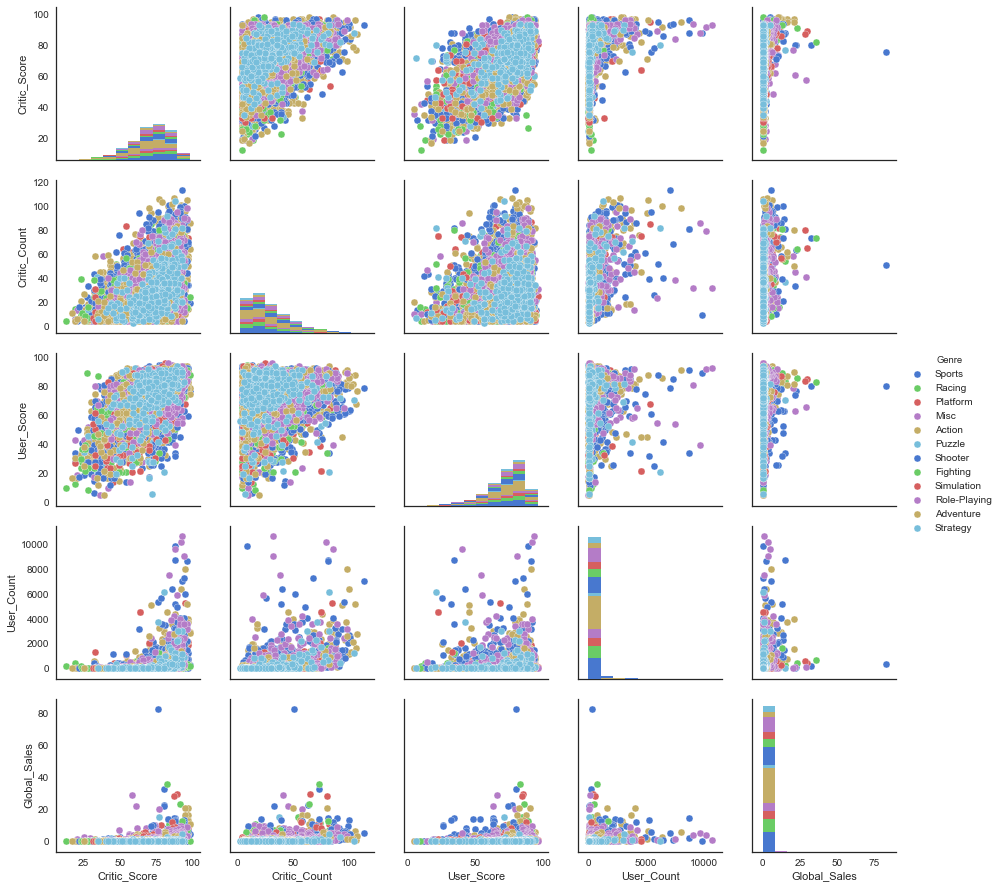

In [344]:
sns.pairplot(filtered_data, vars=["Critic_Score", "Critic_Count", "User_Score","User_Count", "Global_Sales"], hue="Genre", palette="muted")

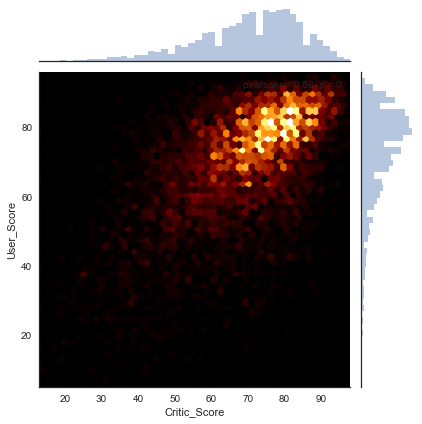

In [345]:
sns.jointplot(x='Critic_Score',y='User_Score',data=df,
              kind='hex', cmap='afmhot')

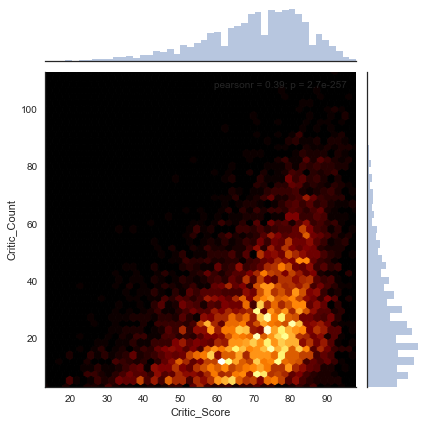

In [346]:
sns.jointplot(x='Critic_Score',y='Critic_Count',data=df,
              kind='hex', cmap='afmhot')

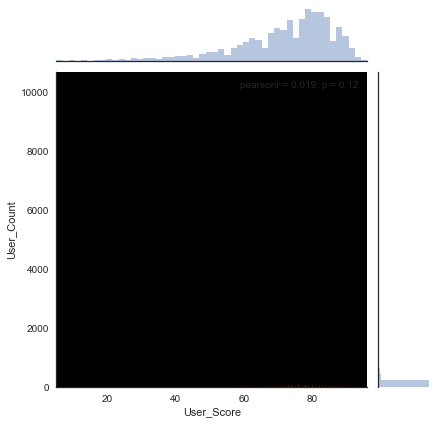

In [347]:
sns.jointplot(x='User_Score',y='User_Count',data=df,
              kind='hex', cmap='afmhot')

Total Samples: 16719


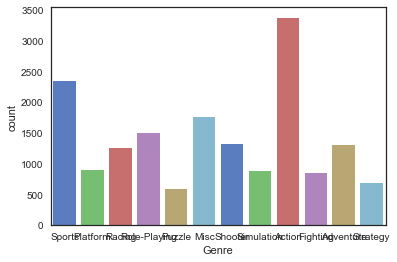

In [348]:
print("Total Samples:", len(data.index))

sns.countplot(x=data["Genre"], palette="muted")

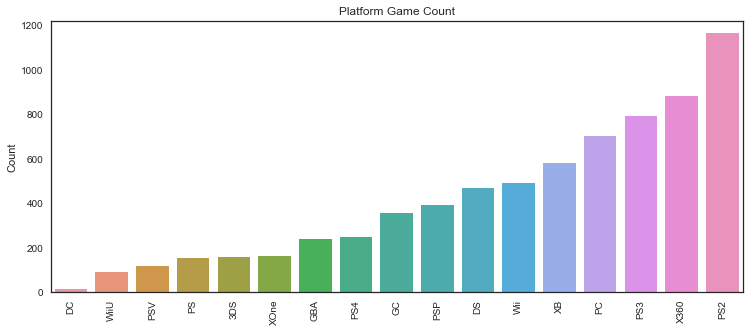

In [349]:
chart = df[['Name', "Platform"]].groupby(["Platform"]).count().sort_values('Name').reset_index()
plt.figure(figsize=(12.4, 5))
plt.xticks(rotation=90)
sns.barplot(x="Platform", y='Name',data=chart[:30])
plt.ylabel('Count')
plt.title("Platform Game Count")
plt.xlabel("")

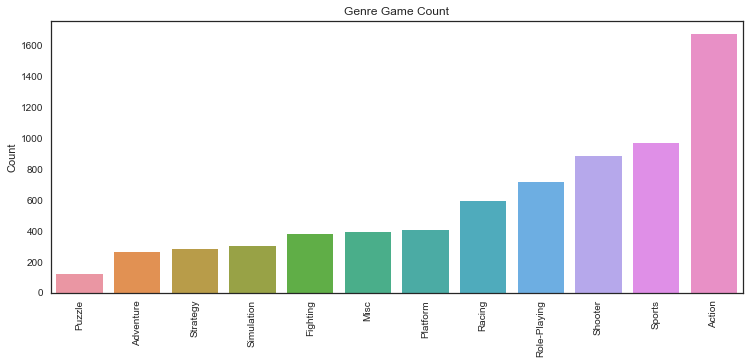

In [350]:
chart = df[['Name', "Genre"]].groupby(["Genre"]).count().sort_values('Name').reset_index()
plt.figure(figsize=(12.4, 5))
plt.xticks(rotation=90)
sns.barplot(x="Genre", y='Name',data=chart[:30])
plt.ylabel('Count')
plt.title("Genre Game Count")
plt.xlabel("")

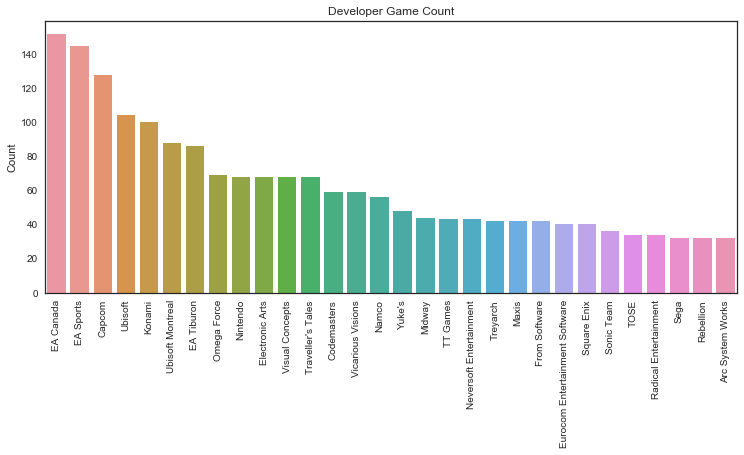

In [351]:
chart = df[['Name', "Developer"]].groupby(["Developer"]).count().sort_values('Name',ascending=False).reset_index()
plt.figure(figsize=(12.4, 5))
plt.xticks(rotation=90)
sns.barplot(x="Developer", y='Name',data=chart[:30])
plt.ylabel('Count')
plt.title("Developer Game Count")
plt.xlabel("")

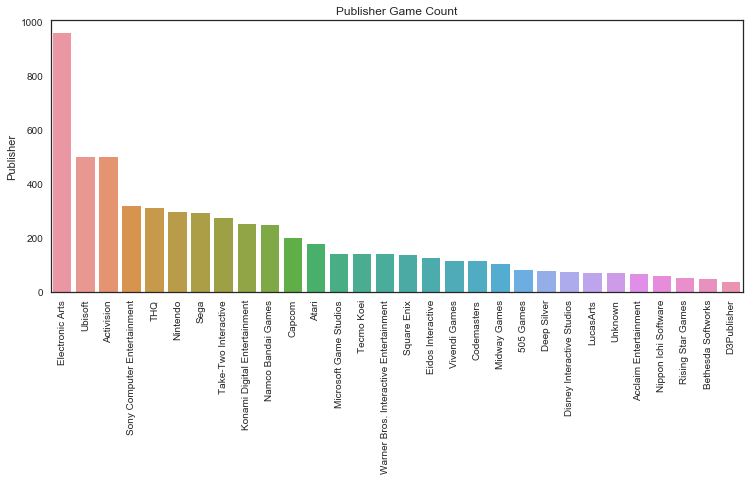

In [352]:
chart = df[['Name', "Publisher"]].groupby(["Publisher"]).count().sort_values('Name',ascending = False).reset_index()
plt.figure(figsize=(12.4, 5))
plt.xticks(rotation=90)
sns.barplot(x="Publisher", y='Name',data=chart[:30])
plt.ylabel('Publisher')
plt.title("Publisher Game Count")
plt.xlabel("")

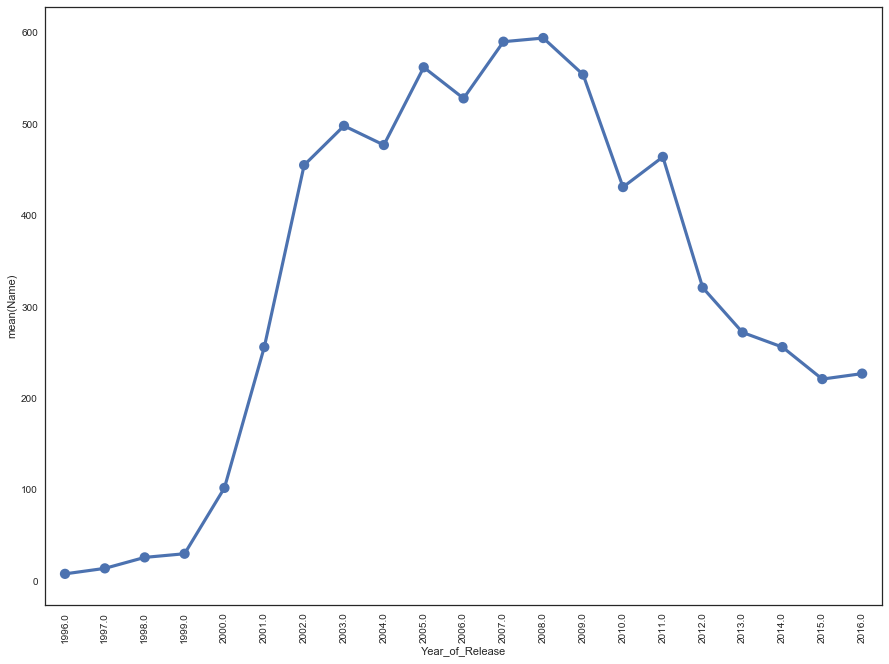

In [353]:
year = df.groupby(['Year_of_Release']).agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.subplots(figsize=(15,11))
ax = sns.pointplot(x=year.index, y=year.Name)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

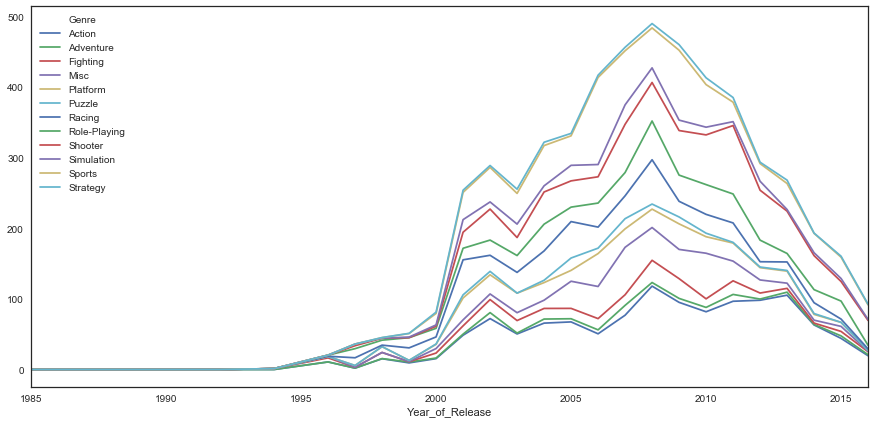

In [354]:
yearlySales = df.groupby(['Year_of_Release','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(stacked=True, figsize=(15, 7) ) 

**Clustering**

In [544]:
import sklearn
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

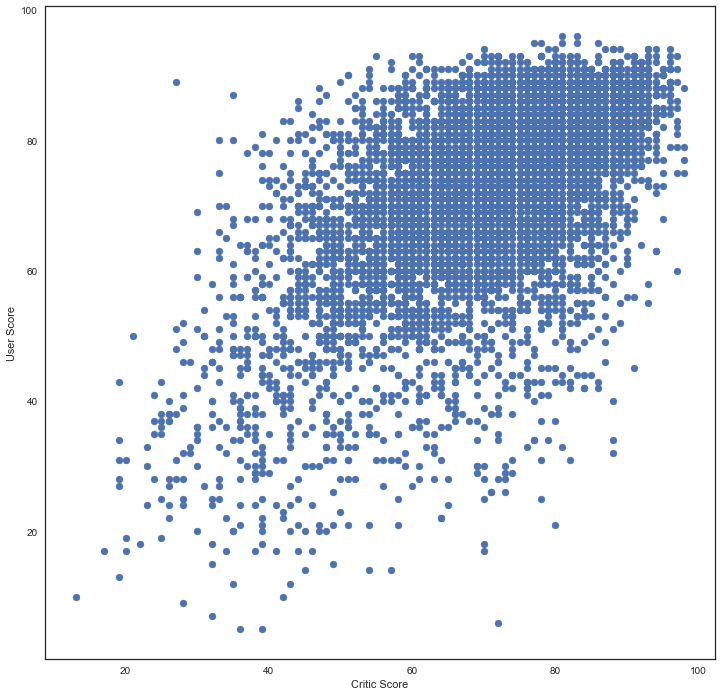

In [356]:
df.head()
plt.subplots(figsize=(12,12))
plt.scatter(df["Critic_Score"],df["User_Score"])
plt.xlabel("Critic Score")
plt.ylabel("User Score")

In [357]:
df2 = df[["Critic_Score","User_Score"]].copy()

arr = np.array(df2)

k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(arr)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

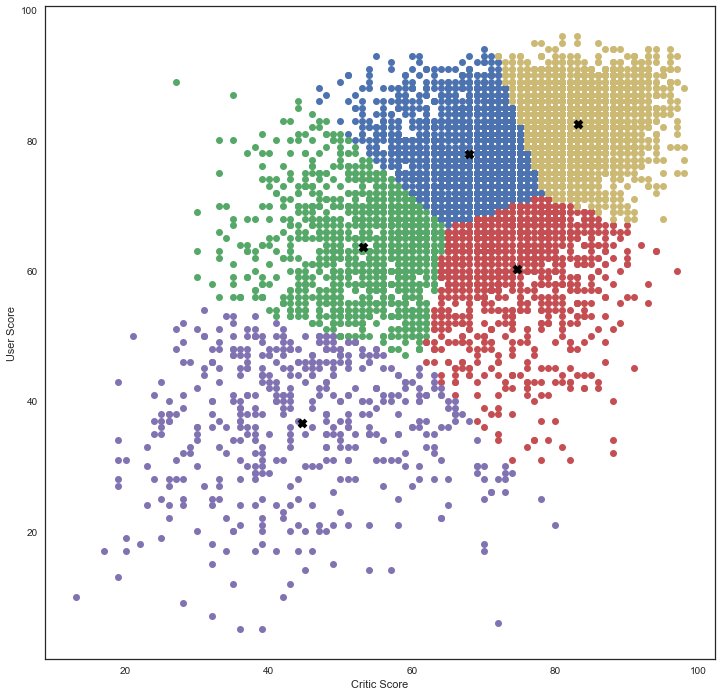

In [359]:
plt.subplots(figsize=(12,12))
for i in range(k):
    arr1 = arr[np.where(labels==i)]
    plt.plot(arr1[:,0],arr1[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,mew=4.0)
plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.show()

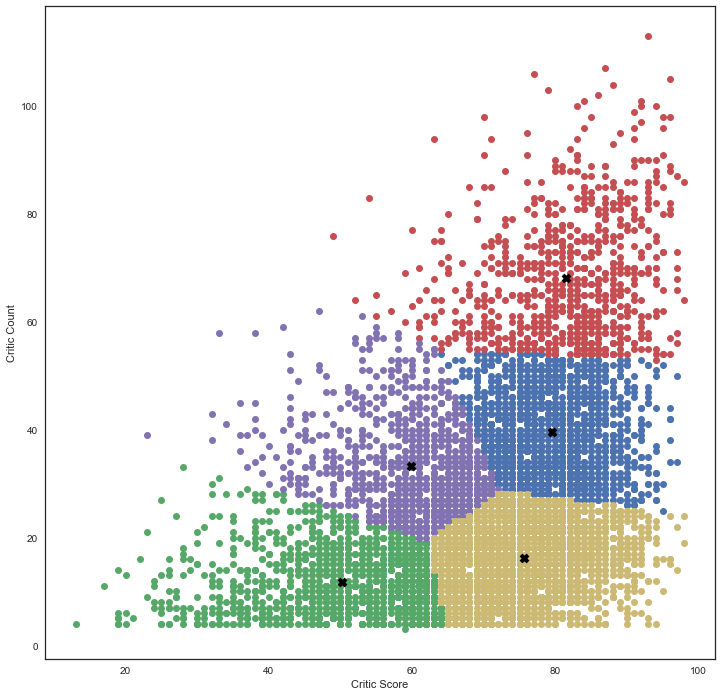

In [360]:
df2 = df[["Critic_Score","Critic_Count"]].copy()

arr = np.array(df2)

k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(arr)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.subplots(figsize=(12,12))
for i in range(k):
    arr1 = arr[np.where(labels==i)]
    plt.plot(arr1[:,0],arr1[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,mew=4.0)
plt.xlabel("Critic Score")
plt.ylabel("Critic Count")
plt.show()

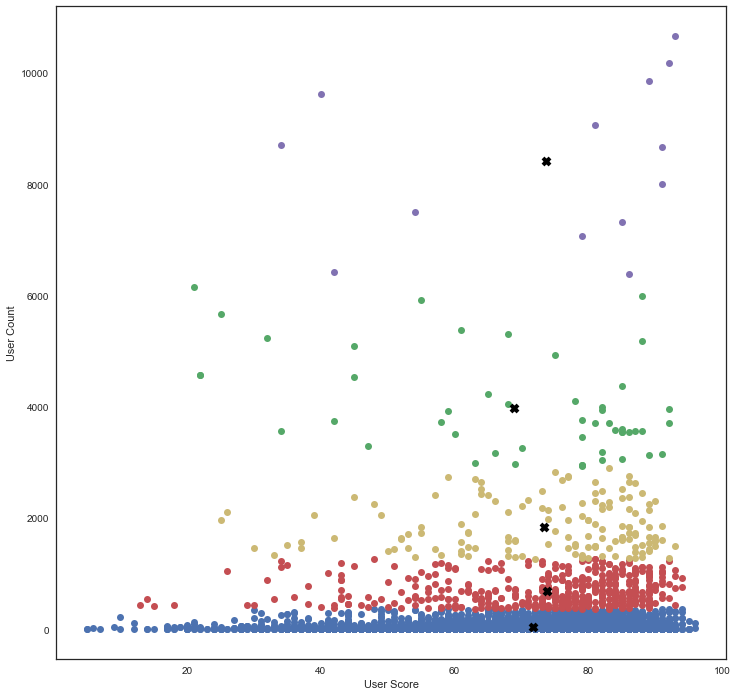

In [361]:
df2 = df[["User_Score","User_Count"]].copy()

arr = np.array(df2)

k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(arr)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.subplots(figsize=(12,12))
for i in range(k):
    arr1 = arr[np.where(labels==i)]
    plt.plot(arr1[:,0],arr1[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,mew=4.0)
plt.xlabel("User Score")
plt.ylabel("User Count")
plt.show()

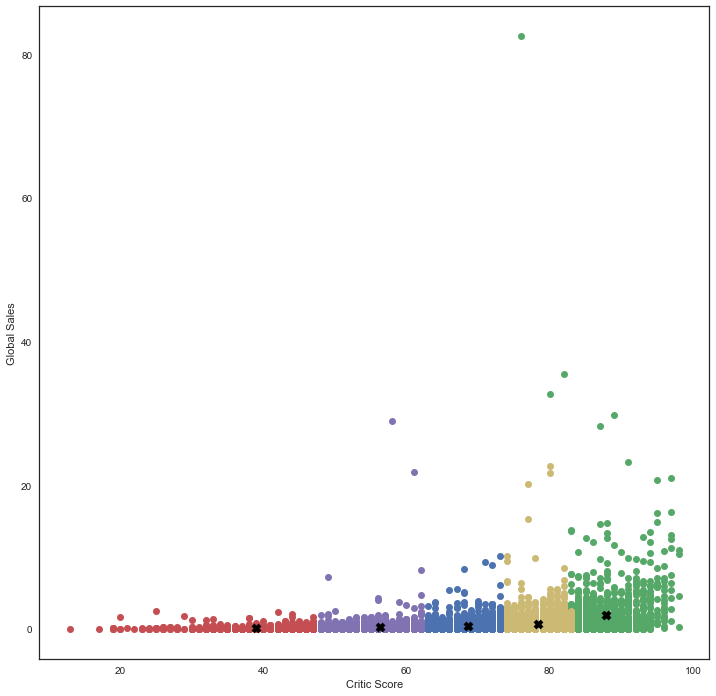

In [362]:
df2 = df[["Critic_Score","Global_Sales"]].copy()

arr = np.array(df2)

k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(arr)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.subplots(figsize=(12,12))
for i in range(k):
    arr1 = arr[np.where(labels==i)]
    plt.plot(arr1[:,0],arr1[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,mew=4.0)
plt.xlabel("Critic Score")
plt.ylabel("Global Sales")
plt.show()

**Regression Analysis**

[(0, 20)]

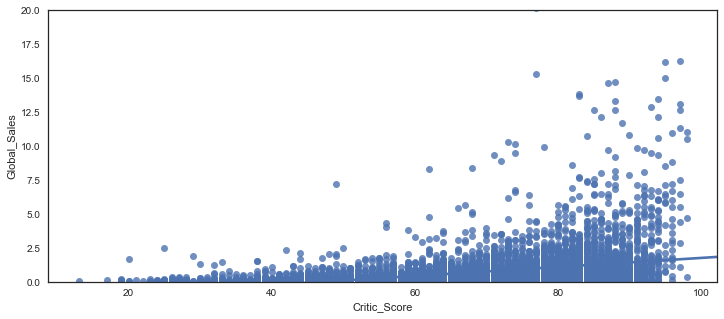

In [363]:
fig, ax = plt.subplots(figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=df, ci=None).set(ylim=(0, 20))

[(0, 20)]

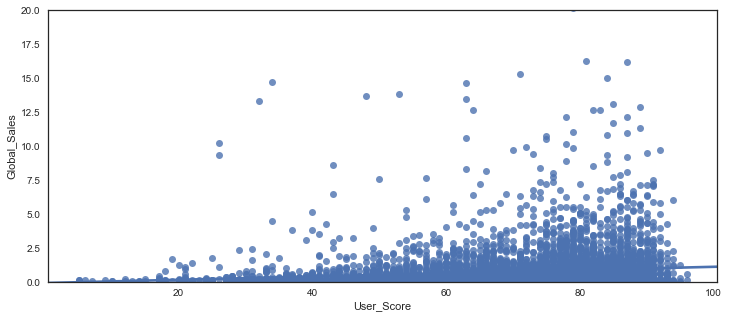

In [364]:
fig, ax = plt.subplots(figsize=(12,5))
sns.regplot(x="User_Score", y="Global_Sales", data=df, ci=None).set(ylim=(0, 20))


[(0, 4)]

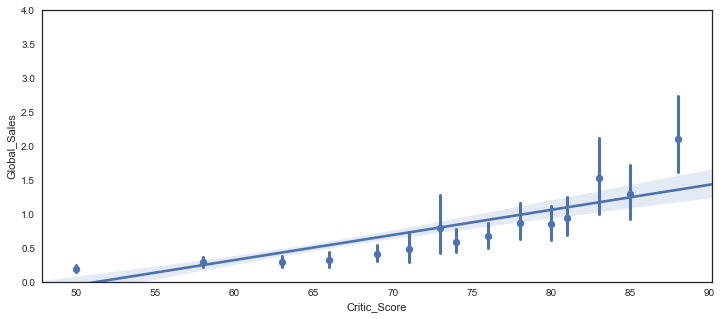

In [365]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=df.loc[df.Year_of_Release >= 2012],truncate=True, x_bins=15).set(ylim=(0, 4))

[(0, 4)]

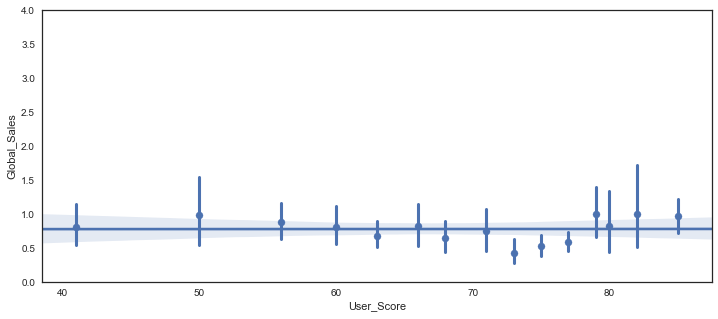

In [366]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="User_Score", y="Global_Sales", data=df.loc[df.Year_of_Release >= 2012],truncate=True, x_bins=15).set(ylim=(0, 4))

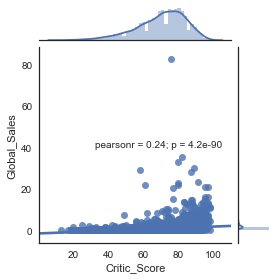

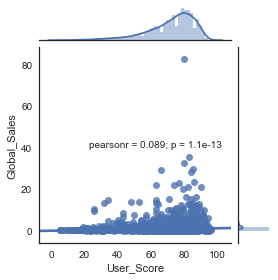

In [367]:
sns.jointplot(x="Critic_Score", y="Global_Sales", data=df, kind = 'reg',fit_reg= True, size = 4)
sns.jointplot(x="User_Score", y="Global_Sales", data=df, kind = 'reg',fit_reg= True, size = 4)
plt.show()

**Predictive Modeling using User Score**

In [612]:
df1 = df[['Name','Platform','Genre','Publisher','Year_of_Release','User_Score','Global_Sales']]
df1 = df1.dropna().reset_index(drop=True)
df2 = df1[['Platform','Genre','Publisher','Year_of_Release','User_Score','Global_Sales']]
df2['Hit'] = df2['Global_Sales']
df2.drop('Global_Sales', axis=1, inplace=True)

def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df2['Hit'] = df2['Hit'].apply(lambda x: hit(x))




df_copy = pd.get_dummies(df2)

df3 = df_copy
y = df3['Hit'].values
df3 = df3.drop(['Hit'],axis=1)
X = df3.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50, random_state=2)

randomforest = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)

log_reg = LogisticRegression().fit(Xtrain, ytrain)

baye = GaussianNB().fit(Xtrain,ytrain)

not_hit_copy = df_copy[df_copy['Hit'] == 0]

df4 = not_hit_copy
y = df4['Hit'].values
df4 = df4.drop(['Hit'],axis=1)
X = df4.values

pred = log_reg.predict_proba(X)
pred2 = randomforest.predict_proba(X)
pred3 = baye.predict_proba(X)

df1 = df1[df1['Global_Sales'] < 1]
dfb2 = df1.copy()
dfb3 = df1.copy()
df1['Hit_Probability'] = pred[:,1]
#Random Forest
dfb2['Hit_Probability'] = pred2[:,1]
dfb3['Hit_Probability'] = pred3[:,1]

df1 = df1[df1['Year_of_Release'] == 2016]
dfb2 = dfb2[dfb2['Year_of_Release'] == 2016]
dfb3 = dfb3[dfb3['Year_of_Release'] == 2016]
df1.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
dfb2.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
dfb3.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
print("Log Reg Predictions")
df1[:10]


Log Reg Predictions


,Name,Platform,Genre,Publisher,Year_of_Release,User_Score,Global_Sales,Hit_Probability
1710,Titanfall 2,PS4,Shooter,Electronic Arts,2016.0,84.0,0.75,0.578512
1408,Kirby: Planet Robobot,3DS,Action,Nintendo,2016.0,87.0,0.93,0.554916
6881,Fast Racing Neo,WiiU,Action,Nintendo,2016.0,85.0,0.01,0.550898
3035,Star Fox: Zero,WiiU,Shooter,Nintendo,2016.0,74.0,0.36,0.538158
2512,Plants vs. Zombies: Garden Warfare 2,XOne,Shooter,Electronic Arts,2016.0,81.0,0.48,0.514371
2482,Plants vs. Zombies: Garden Warfare 2,PS4,Shooter,Electronic Arts,2016.0,77.0,0.49,0.511284
2165,Titanfall 2,XOne,Shooter,Electronic Arts,2016.0,80.0,0.57,0.504677
2999,BioShock The Collection,PS4,Shooter,Take-Two Interactive,2016.0,85.0,0.37,0.463367
3358,Mario Party: Star Rush,3DS,Misc,Nintendo,2016.0,68.0,0.30,0.452181
4570,BioShock The Collection,XOne,Shooter,Take-Two Interactive,2016.0,83.0,0.16,0.409224


[(0, 1)]

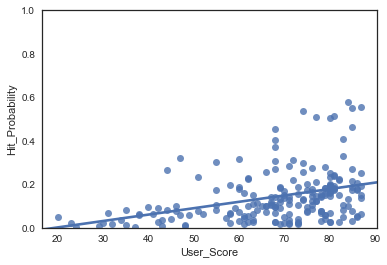

In [613]:
sns.regplot(x="User_Score", y="Hit_Probability", data=df1, ci=None).set(ylim=(0,1))

In [614]:
print("Random Forest Predictions")
dfb2[:10]

Random Forest Predictions


,Name,Platform,Genre,Publisher,Year_of_Release,User_Score,Global_Sales,Hit_Probability
6881,Fast Racing Neo,WiiU,Action,Nintendo,2016.0,85.0,0.01,0.8
2090,WWE 2K17,PS4,Sports,Take-Two Interactive,2016.0,69.0,0.60,0.8
1402,EA Sports UFC 2,PS4,Sports,Electronic Arts,2016.0,62.0,0.93,0.7
3363,Naruto Shippuden: Ultimate Ninja Storm 4,XOne,Fighting,Namco Bandai Games,2016.0,85.0,0.30,0.5
6397,Duke Nukem 3D: 20th Anniversary World Tour,PS4,Shooter,Gearbox Software,2016.0,69.0,0.03,0.5
6790,Super Stardust Ultra VR,PS4,Shooter,Sony Computer Entertainment,2016.0,62.0,0.01,0.5
2999,BioShock The Collection,PS4,Shooter,Take-Two Interactive,2016.0,85.0,0.37,0.4
2782,Paper Mario: Color Splash,WiiU,Role-Playing,Nintendo,2016.0,68.0,0.42,0.4
3747,Sid Meier's Civilization VI,PC,Strategy,Take-Two Interactive,2016.0,73.0,0.25,0.4
3358,Mario Party: Star Rush,3DS,Misc,Nintendo,2016.0,68.0,0.30,0.4


[(0, 1)]

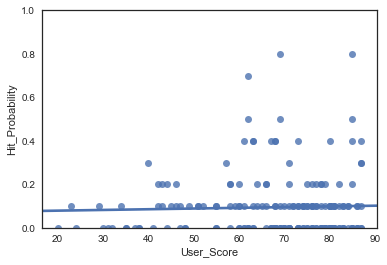

In [616]:
sns.regplot(x="User_Score", y="Hit_Probability", data=dfb2, ci=None).set(ylim=(0,1))

In [617]:
print("Bayes Prediction")
dfb3[:50]

Bayes Prediction


,Name,Platform,Genre,Publisher,Year_of_Release,User_Score,Global_Sales,Hit_Probability
1402,EA Sports UFC 2,PS4,Sports,Electronic Arts,2016.0,62.0,0.93,1.0
5673,Assassin's Creed The Ezio Collection,XOne,Action,Ubisoft,2016.0,76.0,0.08,1.0
5510,Terraria,3DS,Action,505 Games,2016.0,71.0,0.09,1.0
1408,Kirby: Planet Robobot,3DS,Action,Nintendo,2016.0,87.0,0.93,1.0
5595,Battleborn,PC,Shooter,Take-Two Interactive,2016.0,69.0,0.08,1.0
5601,Mega Man Legacy Collection,PS4,Platform,Capcom,2016.0,61.0,0.08,1.0
5614,Titanfall 2,PC,Shooter,Electronic Arts,2016.0,80.0,0.08,1.0
5657,Resident Evil 6,PS4,Shooter,Capcom,2016.0,67.0,0.08,1.0
5667,Song of the Deep,PS4,Action,Insomniac Games,2016.0,73.0,0.08,1.0
5690,Valentino Rossi: The Game,PS4,Racing,Namco Bandai Games,2016.0,80.0,0.08,1.0


[(0, 1)]

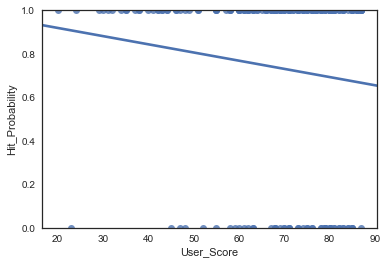

In [618]:
sns.regplot(x="User_Score", y="Hit_Probability", data=dfb3, ci=None).set(ylim=(0,1))

**Predictive Modeling using Critic Score**

In [619]:
df1 = df[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df1 = df1.dropna().reset_index(drop=True)
df2 = df1[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df2['Hit'] = df2['Global_Sales']
df2.drop('Global_Sales', axis=1, inplace=True)

def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df2['Hit'] = df2['Hit'].apply(lambda x: hit(x))




df_copy = pd.get_dummies(df2)

df3 = df_copy
y = df3['Hit'].values
df3 = df3.drop(['Hit'],axis=1)
X = df3.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50, random_state=2)

randomforest = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)

log_reg = LogisticRegression().fit(Xtrain, ytrain)

baye = GaussianNB().fit(Xtrain,ytrain)

not_hit_copy = df_copy[df_copy['Hit'] == 0]

df4 = not_hit_copy
y = df4['Hit'].values
df4 = df4.drop(['Hit'],axis=1)
X = df4.values

pred = log_reg.predict_proba(X)
pred2 = randomforest.predict_proba(X)
pred3 = baye.predict_proba(X)

df1 = df1[df1['Global_Sales'] < 1]
dfb2 = df1.copy()
dfb3 = df1.copy()
df1['Hit_Probability'] = pred[:,1]
#Random Forest
dfb2['Hit_Probability'] = pred2[:,1]
dfb3['Hit_Probability'] = pred3[:,1]

df1 = df1[df1['Year_of_Release'] == 2016]
dfb2 = dfb2[dfb2['Year_of_Release'] == 2016]
dfb3 = dfb3[dfb3['Year_of_Release'] == 2016]
df1.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
dfb2.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
dfb3.sort_values(['Hit_Probability'], ascending=[False], inplace=True)

print("Log Reg Predictions")
df1[:10]


Log Reg Predictions


,Name,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Global_Sales,Hit_Probability
1710,Titanfall 2,PS4,Shooter,Electronic Arts,2016.0,89.0,0.75,0.753510
4769,Skylanders Imaginators,PS4,Platform,Activision,2016.0,80.0,0.14,0.618349
2482,Plants vs. Zombies: Garden Warfare 2,PS4,Shooter,Electronic Arts,2016.0,81.0,0.49,0.601155
2165,Titanfall 2,XOne,Shooter,Electronic Arts,2016.0,87.0,0.57,0.578110
2999,BioShock The Collection,PS4,Shooter,Take-Two Interactive,2016.0,84.0,0.37,0.545768
1408,Kirby: Planet Robobot,3DS,Action,Nintendo,2016.0,81.0,0.93,0.535150
1974,Dishonored 2,PS4,Action,Bethesda Softworks,2016.0,88.0,0.64,0.531433
6881,Fast Racing Neo,WiiU,Action,Nintendo,2016.0,81.0,0.01,0.527781
2953,Deus Ex: Mankind Divided,PS4,Role-Playing,Square Enix,2016.0,84.0,0.38,0.513600
3104,Mirror's Edge Catalyst,PS4,Platform,Electronic Arts,2016.0,69.0,0.35,0.462702


[(0, 1)]

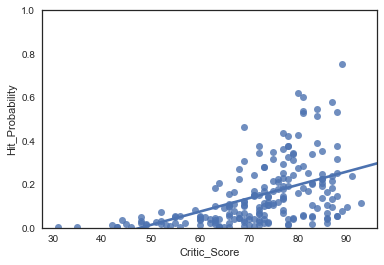

In [620]:
sns.regplot(x="Critic_Score", y="Hit_Probability", data=df1, ci=None).set(ylim=(0,1))

In [621]:
print("Random Forest Predictions")
dfb2[:10]

Random Forest Predictions


,Name,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Global_Sales,Hit_Probability
3866,XCOM 2,PC,Strategy,Take-Two Interactive,2016.0,88.0,0.23,0.5
4214,Mafia III,PC,Action,Take-Two Interactive,2016.0,63.0,0.19,0.5
6881,Fast Racing Neo,WiiU,Action,Nintendo,2016.0,81.0,0.01,0.5
6439,Prison Architect,PS4,Action,Introversion Software,2016.0,80.0,0.03,0.5
2782,Paper Mario: Color Splash,WiiU,Role-Playing,Nintendo,2016.0,75.0,0.42,0.5
3747,Sid Meier's Civilization VI,PC,Strategy,Take-Two Interactive,2016.0,88.0,0.25,0.5
4800,Odin Sphere: Leifthrasir,PSV,Role-Playing,Nippon Ichi Software,2016.0,93.0,0.14,0.4
5822,Eagle Flight,PS4,Adventure,Ubisoft,2016.0,72.0,0.07,0.4
1974,Dishonored 2,PS4,Action,Bethesda Softworks,2016.0,88.0,0.64,0.4
6790,Super Stardust Ultra VR,PS4,Shooter,Sony Computer Entertainment,2016.0,66.0,0.01,0.4


[(0, 1)]

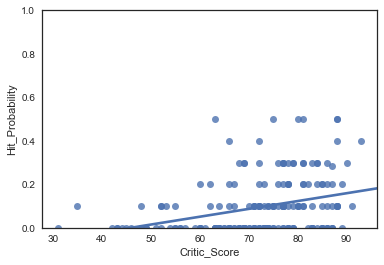

In [622]:
sns.regplot(x="Critic_Score", y="Hit_Probability", data=dfb2, ci=None).set(ylim=(0,1))

In [623]:
print("Bayes Prediction")
dfb3[:50]

Bayes Prediction


,Name,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Global_Sales,Hit_Probability
1402,EA Sports UFC 2,PS4,Sports,Electronic Arts,2016.0,79.0,0.93,1.0
5673,Assassin's Creed The Ezio Collection,XOne,Action,Ubisoft,2016.0,74.0,0.08,1.0
5510,Terraria,3DS,Action,505 Games,2016.0,71.0,0.09,1.0
1408,Kirby: Planet Robobot,3DS,Action,Nintendo,2016.0,81.0,0.93,1.0
5595,Battleborn,PC,Shooter,Take-Two Interactive,2016.0,69.0,0.08,1.0
5601,Mega Man Legacy Collection,PS4,Platform,Capcom,2016.0,77.0,0.08,1.0
5614,Titanfall 2,PC,Shooter,Electronic Arts,2016.0,85.0,0.08,1.0
5657,Resident Evil 6,PS4,Shooter,Capcom,2016.0,60.0,0.08,1.0
5667,Song of the Deep,PS4,Action,Insomniac Games,2016.0,69.0,0.08,1.0
5690,Valentino Rossi: The Game,PS4,Racing,Namco Bandai Games,2016.0,75.0,0.08,1.0


sns.regplot(x="Critic_Score", y="Hit_Probability", data=dfb3, ci=None).set(ylim=(0,1))


**SOURCES**

https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
    
https://chrisalbon.com/machine-learning/random_forest_classifier_example_scikit.html
    
https://www.kaggle.com/ignacioch/predicting-vg-hits-1-million-sales-with-lr-rfc
    
http://scikit-learn.org/stable/modules/classes.html

https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/